# Разведочный анализ данных (Exploratory Data Analysis)

На семинаре продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой seaborn
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* строить простую предсказательную модель


* (бонус) конструировать новые признаки

Основы matplotlib: https://devpractice.ru/matplotlib-lesson-1-quick-start-guide/

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузим данные.

In [2]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

**Задание 1.** Выведите на экран размеры таблицы

In [3]:
Data.shape

(891, 12)

# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [4]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [6]:
Data['Sex'].value_counts()

male       574
female     312
unknown      5
Name: Sex, dtype: int64

**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [7]:
Data = Data[Data['Sex'] != "unknown"]
Data.shape

(886, 12)

Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [8]:
Data['Sex'] = Data['Sex'].apply(lambda x: 1 if x == "male" else 0)
Data['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 886, dtype: int64

Посмотрим, как влияет пол на выживаемость.

In [9]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,S


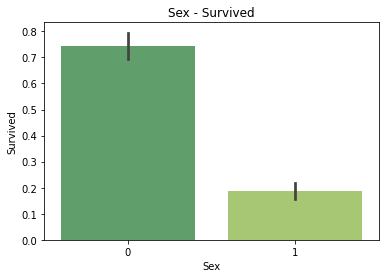

In [10]:
sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

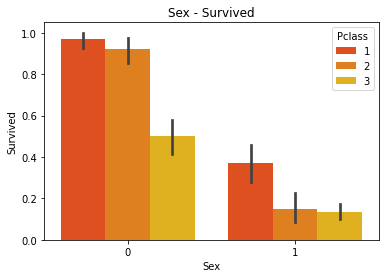

In [11]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

c:\users\asyarita\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


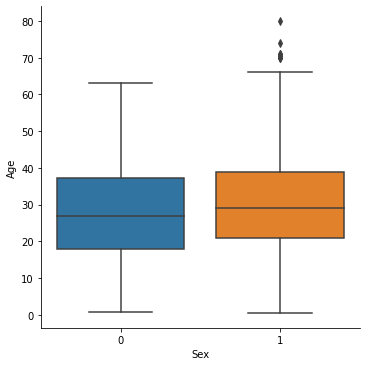

In [12]:
sns.factorplot(x="Sex", y="Age", data=Data, kind="box") # box plot (box-and-whiskers-plot)
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

c:\users\asyarita\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


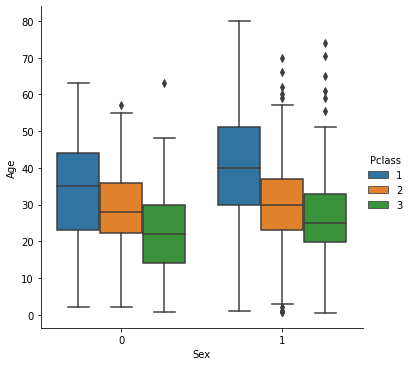

In [13]:
sns.factorplot(x="Sex", y="Age",hue ="Pclass", data=Data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [14]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

S      641
C      168
Q       75
NaN      2
Name: Embarked, dtype: int64


(886, 12)

**Задание 6.** Удалите из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [15]:
Data.dropna(subset = ['Embarked'], inplace=True)

**Задание 7.** Удалите из таблицы Data столбец Embarked.

In [16]:
Data.drop(['Embarked'], axis=1, inplace=True)

In [17]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN


**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [18]:
Data['Age'].isnull().values.any()

True

Заполним пропуски медианным значением Age.

In [19]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

c:\users\asyarita\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


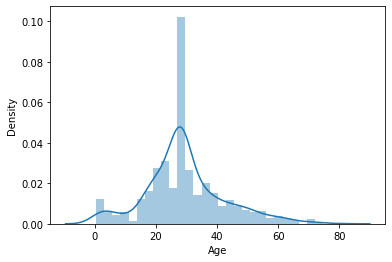

In [20]:
sns.distplot(Data['Age'], kde=True)
plt.show()

Посмотрим на распределение Pclass по возрастам.

c:\users\asyarita\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


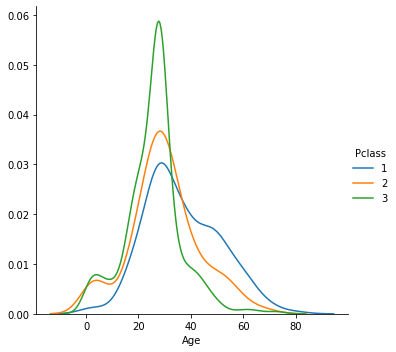

In [21]:
import seaborn as sns

facet = sns.FacetGrid(data = Data, hue = "Pclass", legend_out=True, size = 5)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

**Обработаем признак 'Fare'**

1) Проверим, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполним их медианным значением Fare

In [22]:
Data['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
34.6542     1
61.1750     1
26.3875     1
25.5875     1
8.3000      1
Name: Fare, Length: 246, dtype: int64

In [23]:
Data['Fare'].isna().sum()

0

**Обработаем признак 'Pclass'**

In [24]:
Data['Pclass'].value_counts()

3    487
1    214
2    183
Name: Pclass, dtype: int64

**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

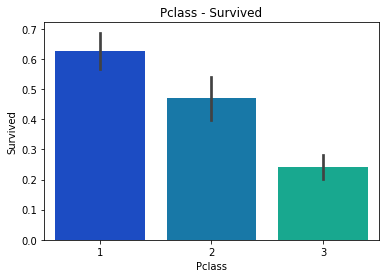

In [25]:
sns.barplot(x='Pclass', y='Survived', data=Data, palette='winter')
plt.title('Pclass - Survived')
plt.show()

Столбец PassengerId является категориальным и не несёт важной информации, удалим его.

In [26]:
Data.drop('PassengerId',axis=1,inplace=True)

In [27]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN
1,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85
2,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123
4,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN


# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

Создадим таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [28]:
NumericData = Data._get_numeric_data()
NumericData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

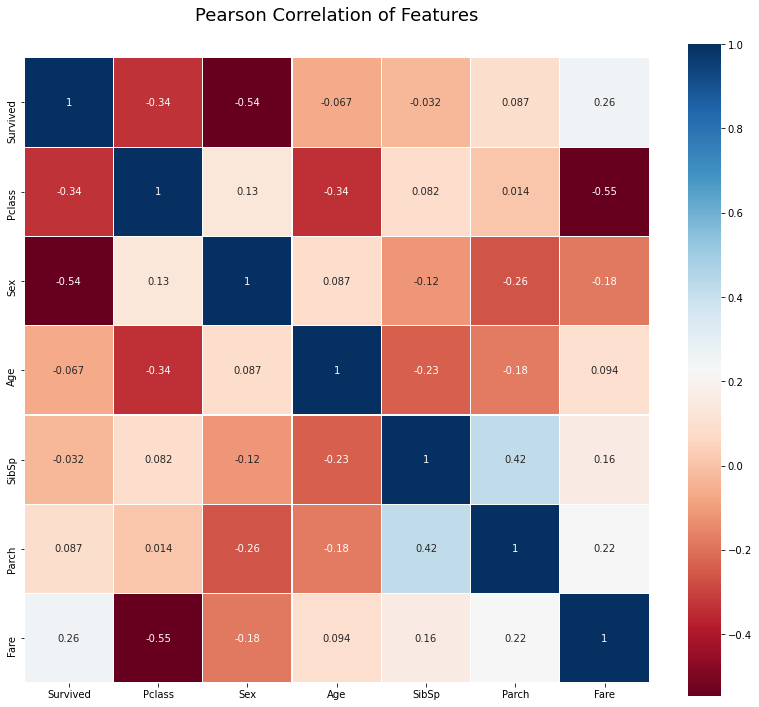

In [29]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

c:\users\asyarita\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


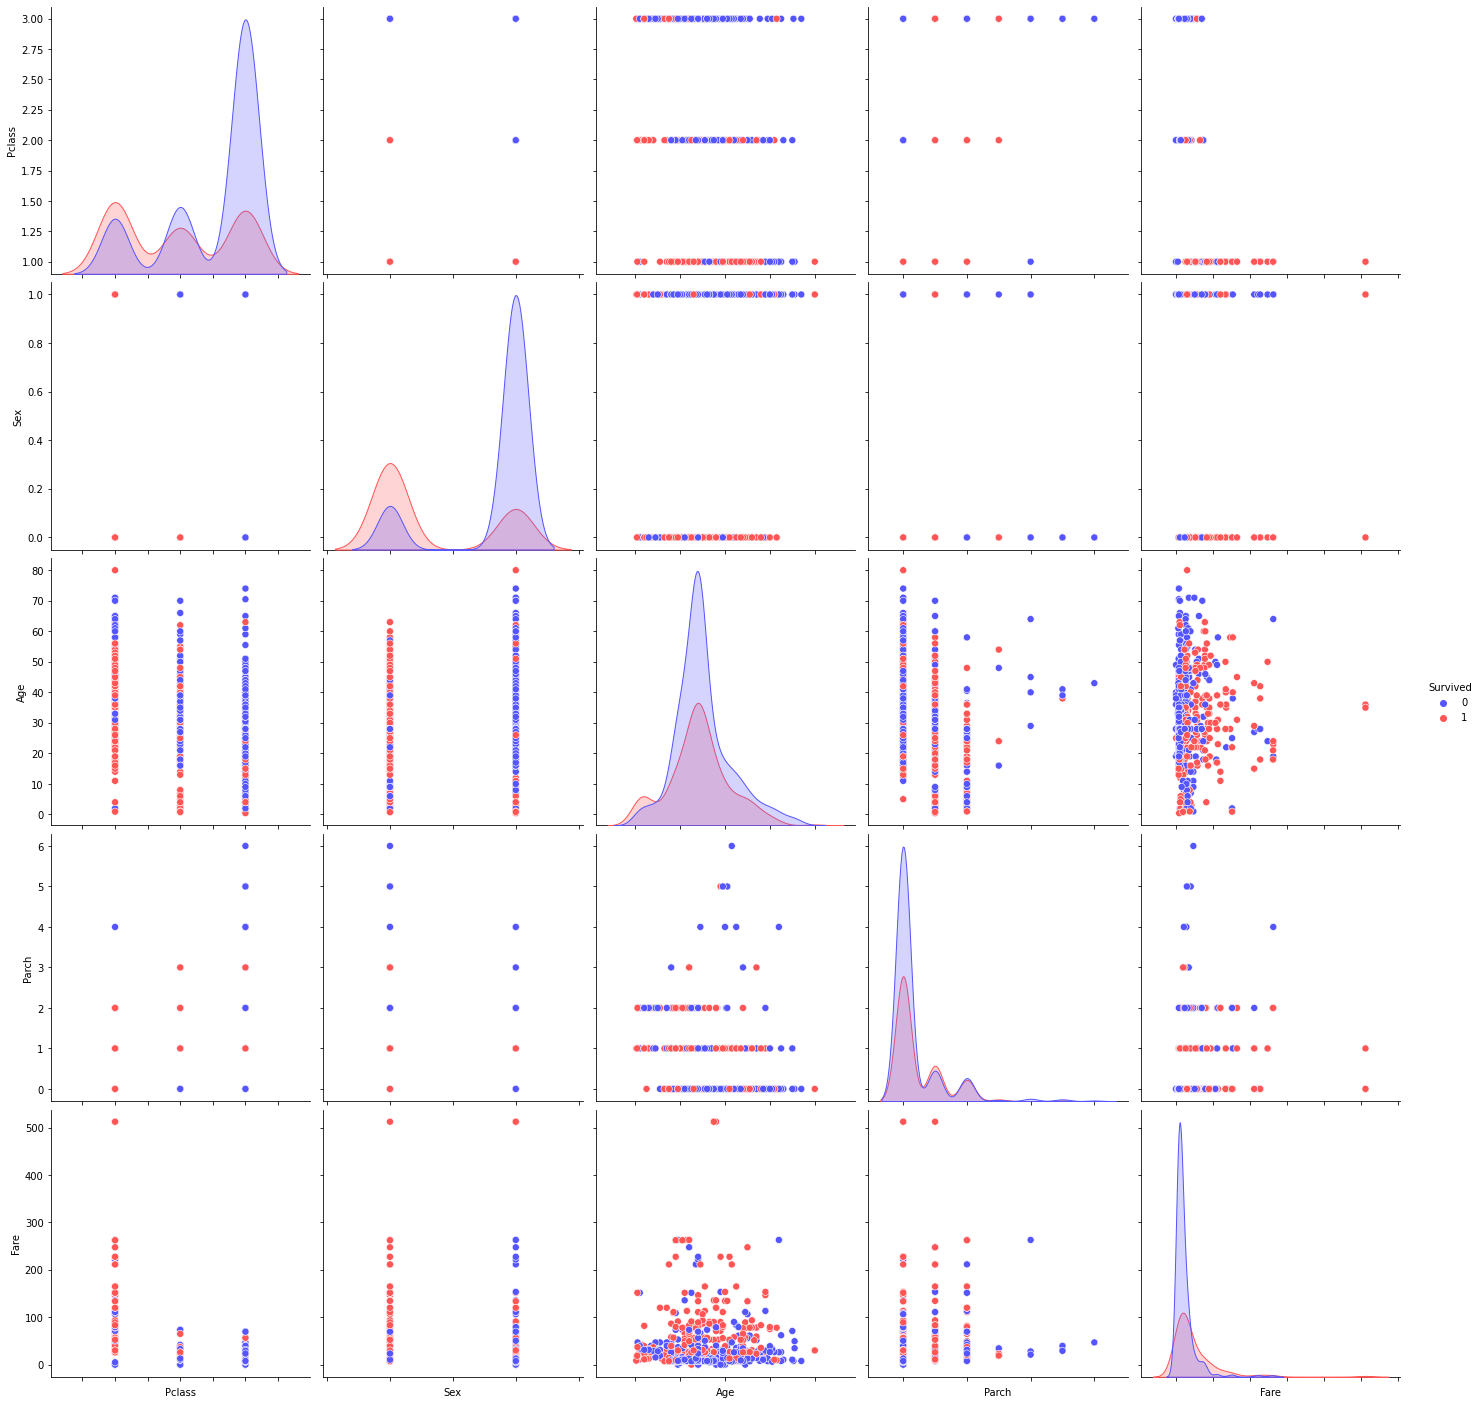

In [30]:
g = sns.pairplot(Data[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], \
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

### Получение простого предсказания.

Мы видим, что больше всего влияют на выживаемость пол и класс:
* женщины, как правило, выживали
* мужчины, да ещё небогатые - нет
* больше погибших, чем выживших

In [31]:
def first_prediction(x):
    if x.Sex == 0:
        return 1
    if x.Sex == 1 and x.Pclass > 1:
        return 0
    return 0

In [32]:
Data['prediction'] = Data.apply(lambda x: first_prediction(x), axis=1)
Data[['Survived','prediction']]

,Survived,prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,1
889,1,0


Посмотрим на качество нашего предсказания.

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(Data['Survived'], Data['prediction'])

0.7873303167420814

## Бонусная часть - домашнее задание (+1 балл к итоговой оценке).

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [34]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

Data['AgeBin'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

Теперь переведём полученные интервалы в числа, используя LabelEncoder. Полученные метки уже можно использовать как числовые признаки.

In [35]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


**Задание 9.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [36]:
Data['FareBin'] = pd.cut(Data['Fare'].astype(int), 4)
Data['FareBin'].head()

0    (-0.512, 128.0]
1    (-0.512, 128.0]
2    (-0.512, 128.0]
3    (-0.512, 128.0]
4    (-0.512, 128.0]
Name: FareBin, dtype: category
Categories (4, interval[float64]): [(-0.512, 128.0] < (128.0, 256.0] < (256.0, 384.0] < (384.0, 512.0]]

In [37]:
Data['FareBin_Code'] = label.fit_transform(Data['FareBin'])
Data[['Fare', 'FareBin', 'FareBin_Code']].head()

,Fare,FareBin,FareBin_Code
0,7.2500,"(-0.512, 128.0]",0
1,71.2833,"(-0.512, 128.0]",0
2,7.9250,"(-0.512, 128.0]",0
3,53.1000,"(-0.512, 128.0]",0
4,8.0500,"(-0.512, 128.0]",0


Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 10.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

* Добавлять единицу нужно, так как признаки `Parch` и `SibSp` не учитывают самого человека, а говорят только о количестве родителей, детей, братьев, сестёр и спругов. Чтобы получить количество человек в семье, нужно учитывать и человека, о котором рассматривается информация.

In [38]:
Data['NameLen'] = Data['Name'].apply(lambda x: len(x))
Data['FamilySize'] = Data.apply(lambda x: x.Parch + x.SibSp + 1, axis=1)
Data['IsAlone'] = Data['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

Data[['Name', 'Survived', 'NameLen', 'FamilySize', 'IsAlone']].head()

,Name,Survived,NameLen,FamilySize,IsAlone
0,Braund; Mr. Owen Harris,0,23,2,0
1,Cumings; Mrs. John Bradley (Florence Briggs Th...,1,51,2,0
2,Heikkinen; Miss. Laina,1,22,1,1
3,Futrelle; Mrs. Jacques Heath (Lily May Peel),1,44,2,0
4,Allen; Mr. William Henry,0,24,1,1


**Задание 11**. Выведите на экран визуализации, отражающие влияние новых созданных признаков на целевую переменную (Survived). Тип визуализации остается на ваше усмотрение.

c:\users\asyarita\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


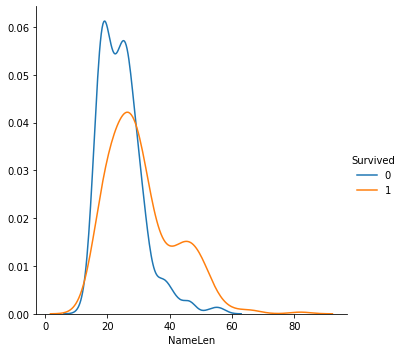

In [39]:
# влияние длины имени на выживание
facet = sns.FacetGrid(data = Data, hue = "Survived", legend_out=True, size = 5)
facet = facet.map(sns.kdeplot, "NameLen")
facet.add_legend();

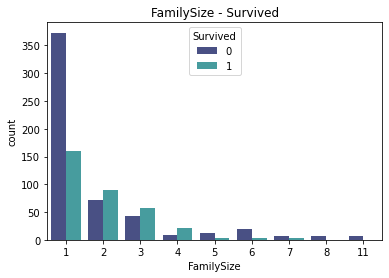

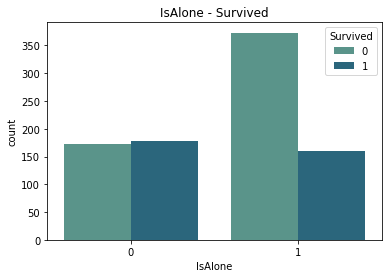

In [40]:
# влияние размера семьи на выживание
sns.countplot(x='FamilySize', hue='Survived', data=Data, palette='mako')
plt.title('FamilySize - Survived')
plt.show()

# влияние одиночества на выживание
sns.countplot(x='IsAlone', hue='Survived', data=Data, palette='crest')
plt.title('IsAlone - Survived')
plt.show()

* Также визуализируем отдельно эти характеристики для разных полов.

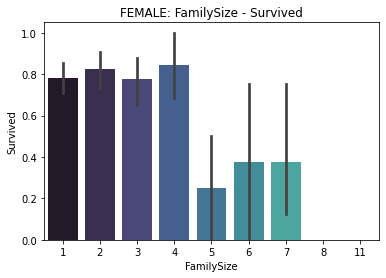

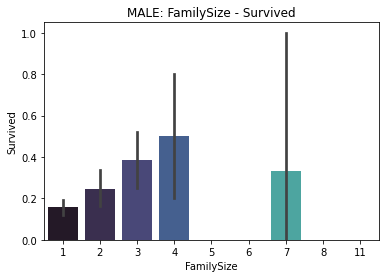

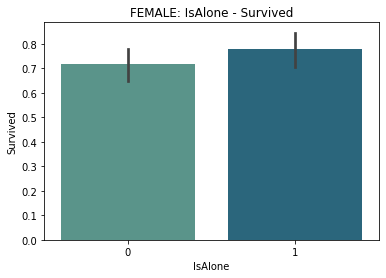

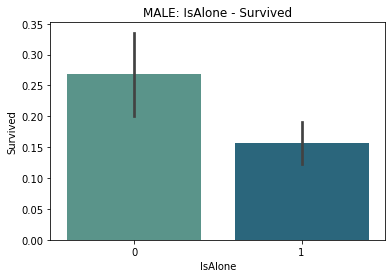

In [41]:
# влияние размера семьи на выживание у FEMALE
sns.barplot(x='FamilySize', y='Survived', data=Data[Data['Sex'] == 0], palette='mako')
plt.title('FEMALE: FamilySize - Survived')
plt.show()
# влияние размера семьи на выживание у MALE
sns.barplot(x='FamilySize', y='Survived', data=Data[Data['Sex'] == 1], palette='mako')
plt.title('MALE: FamilySize - Survived')
plt.show()

# влияние одиночества на выживание у FEMALE
sns.barplot(x='IsAlone', y='Survived', data=Data[Data['Sex'] == 0], palette='crest')
plt.title('FEMALE: IsAlone - Survived')
plt.show()
# влияние одиночества на выживание у MALE
sns.barplot(x='IsAlone', y='Survived', data=Data[Data['Sex'] == 1], palette='crest')
plt.title('MALE: IsAlone - Survived')
plt.show()

**Задание 12.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

<AxesSubplot:title={'center':'Pearson Correlation of New Features'}>

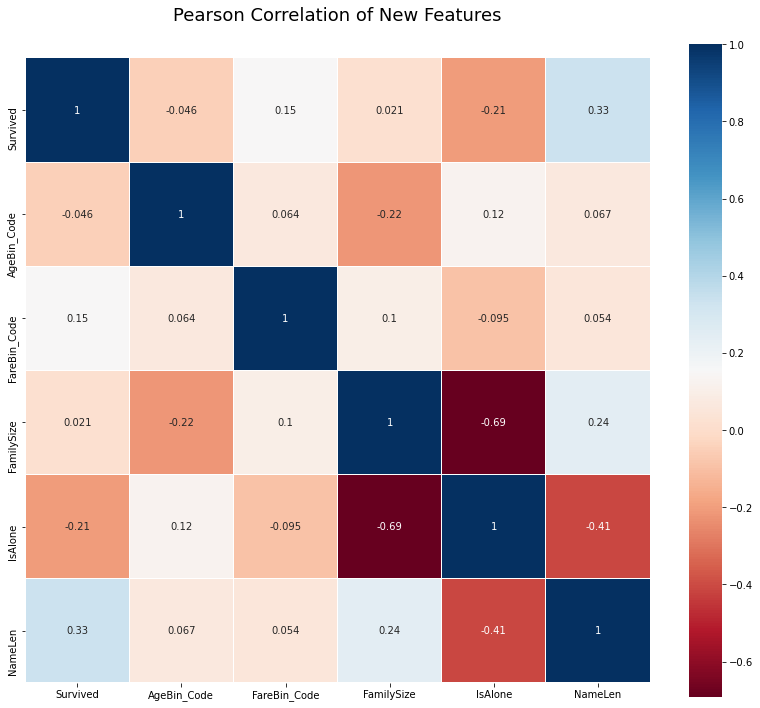

In [42]:
NewNumericData = Data[['Survived', 'AgeBin_Code', 'FareBin_Code', 'FamilySize', 'IsAlone', 'NameLen']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of New Features', y=1.05, size=18)
sns.heatmap(NewNumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 13*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью. Визуализируйте влияние новых признаков на целевую переменную.

* Перед добавлением новых признаков посмотрим, адекватны ли они.

* Сначала посмотрим на уже полученные признаки `FareBin_Code` и `AgeBin_Code` на разных полах для понимания происходящего.

In [43]:
female_data = Data[Data['Sex'] == 0]
male_data = Data[Data['Sex'] == 1]

In [44]:
print('FEMALE:')
display(female_data['FareBin_Code'].value_counts())
display(female_data['Survived'].groupby(Data['FareBin_Code']).mean().sort_values(ascending=False))
print('____________________')
print('MALE:')
display(male_data['FareBin_Code'].value_counts())
display(male_data['Survived'].groupby(Data['FareBin_Code']).mean().sort_values(ascending=False))

FEMALE:


0    284
1     21
2      4
3      1
Name: FareBin_Code, dtype: int64

FareBin_Code
2    1.000000
3    1.000000
1    0.904762
0    0.725352
Name: Survived, dtype: float64

____________________
MALE:


0    562
1      8
2      2
3      2
Name: FareBin_Code, dtype: int64

FareBin_Code
3    1.000000
1    0.250000
0    0.185053
2    0.000000
Name: Survived, dtype: float64

In [45]:
print('FEMALE:')
display(female_data['AgeBin_Code'].value_counts())
display(female_data['Survived'].groupby(Data['AgeBin_Code']).mean().sort_values(ascending=False))
print('____________________')
print('MALE:')
display(male_data['AgeBin_Code'].value_counts())
display(male_data['Survived'].groupby(Data['AgeBin_Code']).mean().sort_values(ascending=False))

FEMALE:


1    172
2     66
0     49
3     23
Name: AgeBin_Code, dtype: int64

AgeBin_Code
3    0.913043
2    0.787879
1    0.720930
0    0.673469
Name: Survived, dtype: float64

____________________
MALE:


1    350
2    118
0     50
3     45
4     11
Name: AgeBin_Code, dtype: int64

AgeBin_Code
0    0.420000
2    0.186441
3    0.177778
1    0.160000
4    0.090909
Name: Survived, dtype: float64

* Видно, что пассажиры, заплатившие много, всегда выживали.

* Теперь посмотрим на статус пасажиров и их выживамость в зависимости от этого статуса. Как показывает код ниже, люди некоторых статусов либо всегда выживали, либо всегда не выживали.

In [46]:
Data['Status'] = Data['Name'].apply(lambda x: x.split('; ')[1].split('.')[0])
display(Data['Status'].value_counts())
display(Data['Survived'].groupby(Data['Status']).mean().sort_values(ascending=False))

Mr              515
Miss            180
Mrs             123
Master           39
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Sir               1
Capt              1
Ms                1
Mme               1
the Countess      1
Jonkheer          1
Lady              1
Don               1
Name: Status, dtype: int64

Status
the Countess    1.000000
Mlle            1.000000
Sir             1.000000
Ms              1.000000
Lady            1.000000
Mme             1.000000
Mrs             0.796748
Miss            0.694444
Master          0.564103
Col             0.500000
Major           0.500000
Dr              0.428571
Mr              0.157282
Jonkheer        0.000000
Rev             0.000000
Don             0.000000
Capt            0.000000
Name: Survived, dtype: float64

* Считаю полученный результат полезным, поэтому превратим колонку `Status` в числовую.

In [47]:
status_priority = {'the Countess': 1, 'Mlle': 1, 'Sir': 1, 'Ms': 1, 'Lady': 1, 'Mme': 1,
                  'Mrs': 2, 'Miss': 2, 'Master': 3, 'Col': 3, 'Major': 3, 'Dr': 4, 'Mr': 4,
                  'Jonkheer': 5, 'Rev': 5, 'Don': 5, 'Capt': 5}

Data['Status'] = Data['Status'].apply(lambda x: status_priority[x])
Data[['Name', 'Status', 'Survived']].head()

,Name,Status,Survived
0,Braund; Mr. Owen Harris,4,0
1,Cumings; Mrs. John Bradley (Florence Briggs Th...,2,1
2,Heikkinen; Miss. Laina,2,1
3,Futrelle; Mrs. Jacques Heath (Lily May Peel),2,1
4,Allen; Mr. William Henry,4,0


* Рассмотрим, как местоположение кабины влияло на выживаемость. Обработаем кабины по первой букве.

In [48]:
Data['CabinPlacement'] = Data['Cabin'].apply(lambda x: str(x)[0])
display(Data['CabinPlacement'].value_counts())
display(Data['Survived'].groupby(Data['CabinPlacement']).mean().sort_values(ascending=False))

n    682
C     59
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinPlacement, dtype: int64

CabinPlacement
D    0.757576
E    0.750000
B    0.733333
F    0.615385
C    0.593220
G    0.500000
A    0.466667
n    0.299120
T    0.000000
Name: Survived, dtype: float64

* Преобразуем результат в числа.

In [49]:
cabin_priority = {'D': 1, 'E': 1, 'B': 1, 'F': 2, 'C': 2, 'G': 3, 'A': 3, 'n': 4, 'T': 5}

Data['CabinPlacement'] = Data['CabinPlacement'].apply(lambda x: cabin_priority[x])
Data[['Name', 'CabinPlacement', 'Survived']].head()

,Name,CabinPlacement,Survived
0,Braund; Mr. Owen Harris,4,0
1,Cumings; Mrs. John Bradley (Florence Briggs Th...,2,1
2,Heikkinen; Miss. Laina,4,1
3,Futrelle; Mrs. Jacques Heath (Lily May Peel),2,1
4,Allen; Mr. William Henry,4,0


* Посмотрим на корреляции новых признаков с `Survived`

<AxesSubplot:title={'center':'Pearson Correlation of My Features'}>

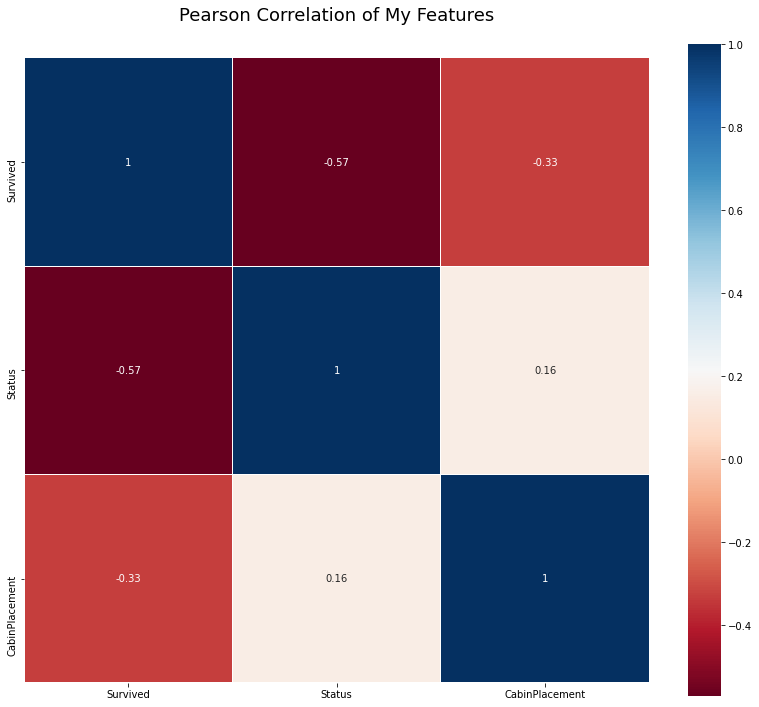

In [50]:
MyFeaturesData = Data[['Survived', 'Status', 'CabinPlacement']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of My Features', y=1.05, size=18)
sns.heatmap(MyFeaturesData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

* Нормальные получились корреляции.

**Задание 14.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

* Нет, не всегда. В комбинации с другими признаками он может быть полезен. На основе признака с маленькой корреляцией можно получить новый признак (взять его в комбинации с другими признаками или по-другому предобработать его), который будет "хорошо" коррелировать с выживаемостью.

* Корреляция не всегда показывает схожесть признаков и ответов, иногда признак может прекрасно описать ответ, но при этом корреляция Пирсона никак не отображает этого.

**Задание 15.** Попробуйте улучшить предсказание нашей модели, используя, кроме признаков Sex и Pclass другие признаки.

In [51]:
Data[['Survived', 'Sex', 'AgeBin_Code', 'FareBin_Code', 'FamilySize', 'IsAlone', 'Status', 'CabinPlacement']]

,Survived,Sex,AgeBin_Code,FareBin_Code,FamilySize,IsAlone,Status,CabinPlacement
0,0,1,1,0,2,0,4,4
1,1,0,2,0,2,0,2,2
2,1,0,1,0,1,1,2,4
3,1,0,2,0,2,0,2,2
4,0,1,2,0,1,1,4,4
...,...,...,...,...,...,...,...,...
886,0,1,1,0,1,1,5,4
887,1,0,1,0,1,1,2,1
888,0,0,1,0,4,0,2,4
889,1,1,1,0,1,1,4,2


In [52]:
def predict(x):
    if x.Status == 1 or x.FareBin_Code == 3:
        return 1
    if x.Status == 5 or x.CabinPlacement == 5:
        return 0
    if x.Sex == 0:
        if x.Pclass < 3:
            return 1
        if x.FamilySize < 5:
            return 1
    if x.Sex == 1:
        if x.Status < 4:
            return 1
        if x.Pclass == 1 and x.FareBin_Code == 2:
            return 1
    return 0

Data['new_prediction'] = Data.apply(lambda x: predict(x), axis=1)
Data[['Survived', 'new_prediction']]

,Survived,new_prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,1
889,1,0


In [53]:
accuracy_score(Data['Survived'], Data['new_prediction'])

0.8178733031674208

**Итог:** полчиось улучшить модель до 81.8%. При использовании какого-нибудь `Classifier`, втроеного в `sklearn`, могло бы наверное получится лучше.